# Modules and Packages

## Creating and Using Modules
Modules in Julia help organize code into namespaces. This is useful for structuring larger programs and avoiding name conflicts.

### Creating a Module

In [ ]:
# Define a module named MyModule
module MyModule

# Exported function
export greet

# A simple function to greet a person
greet(name) = println("Hello, $name!")

# Internal function, not exported
goodbye(name) = println("Goodbye, $name")

end


Main.MyModule

### Using a Module

In [ ]:
# Use the module MyModule
using .MyModule

# Call the exported function
greet("Alice")

# Note: Trying to call the internal function will result in an error
# goodbye("Alice")  # This will throw an error


Hello, Alice


## Loading Packages
Julia uses packages to extend its functionality. You can load and use packages with `using` and `import`.

### Installing Packages
Packages can be installed using the Julia package manager `Pkg`.

In [ ]:
using Pkg
Pkg.status()  # Check the status of your packages and registry


Status `~/.julia/environments/v1.10/Project.toml`
  [a93c6f00] DataFrames v1.6.1
  [0c46a032] DifferentialEquations v7.13.0
  [587475ba] Flux v0.14.15
  [7073ff75] IJulia v1.24.2
  [682c06a0] JSON v0.21.4
  [b964fa9f] LaTeXStrings v1.3.1
  [91a5bcdd] Plots v1.40.4


In [ ]:

# Install the JSON package
using Pkg
Pkg.add("JSON")


### Using Packages

In [ ]:

# Load the JSON package
using JSON

# Parse a JSON string
json_str = """{"name": "Alice", "age": 30}"""
data = JSON.parse(json_str)
println("Name: ", data["name"])
println("Age: ", data["age"])


Name: Alice
Age: 30


### Import vs Using
- `using` brings all exported symbols of a module into scope.
- `import` allows selective importing of specific functions or modules.

In [ ]:

# Using the Dates package
using Dates

# Current date and time
current_time = now()
println("Current time: ", current_time)

# Importing a specific function from Dates
import Dates: Date

# Creating a specific date
specific_date = Date(2020, 1, 1)
println("Specific date: ", specific_date)


Current time: 2024-06-01T18:44:29.781
Specific date: 2020-01-01


## Creating Your Own Package
Creating a package in Julia involves structuring your code properly and providing metadata.

### Package Structure
```plaintext
MyPackage/
├── Project.toml
├── src/
│   └── MyPackage.jl
```

### Example Package
1. Create a directory named `MyPackage`.
2. Inside `MyPackage`, create a `Project.toml` file with the following content:
   ```toml
   name = "MyPackage"
   uuid = "12345678-1234-5678-1234-567812345678"
   authors = ["Your Name <you@example.com>"]
   version = "0.1.0"
   ```

3. Create a `src` directory inside `MyPackage` and add a file named `MyPackage.jl` with the following content:
   ```julia
   module MyPackage

   export hello

   hello() = println("Hello from MyPackage!")

   end
   ```

4. To use your package, navigate to the directory containing `MyPackage` and run:
   ```julia
   using Pkg
   Pkg.activate(".")
   using MyPackage

   hello()
   ```

## Managing Packages with Pkg
### Adding and Removing Packages

In [ ]:

# Add a package
Pkg.add("ExamplePackage")

# Remove a package
Pkg.rm("ExamplePackage")


### Updating Packages

In [ ]:

# Update all installed packages
Pkg.update()


LoadError: UndefVarError: `Pkg` not defined

### Checking Package Status

In [ ]:
using Pkg
# Check the status of installed packages
Pkg.status()
Pkg.update()

Status `~/.julia/environments/v1.10/Project.toml`
  [a93c6f00] DataFrames v1.6.1
  [0c46a032] DifferentialEquations v7.13.0
  [587475ba] Flux v0.14.15
  [60bf3e95] GLPK v1.2.1
  [7073ff75] IJulia v1.24.2
  [682c06a0] JSON v0.21.4
  [4076af6c] JuMP v1.22.1
  [b964fa9f] LaTeXStrings v1.3.1
  [91a5bcdd] Plots v1.40.4


    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


## Important Julia Packages and Modules

### 1. DataFrames.jl
`DataFrames.jl` provides a data structure for storing and manipulating tabular data.

In [ ]:
using Pkg
Pkg.add("DataFrames")

In [ ]:
using DataFrames

# Create a DataFrame
df = DataFrame(Name=["Alice", "Bob", "Charlie"], Age=[25, 30, 35])
println(df)

# Basic operations
println("First row: ", first(df, 1))
println("Subset of data: ", df[:, [:Name, :Age]])

3×2 DataFrame
 Row │ Name     Age   
     │ String   Int64 
─────┼────────────────
   1 │ Alice       25
   2 │ Bob         30
   3 │ Charlie     35
First row: 1×2 DataFrame
 Row │ Name    Age   
     │ String  Int64 
─────┼───────────────
   1 │ Alice      25
Subset of data: 3×2 DataFrame
 Row │ Name     Age   
     │ String   Int64 
─────┼────────────────
   1 │ Alice       25
   2 │ Bob         30
   3 │ Charlie     35


### 2. Plots.jl

`Plots.jl` is a powerful plotting package in Julia.

In [ ]:
using Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


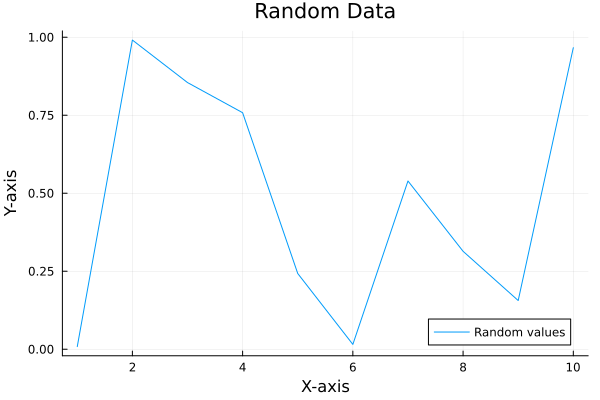

In [ ]:
using Plots

# Create a simple plot
x = 1:10
y = rand(10)
plot(x, y, title="Random Data", xlabel="X-axis", ylabel="Y-axis", label="Random values")

### 3. Flux.jl
`Flux.jl` is a machine learning library for Julia.

In [ ]:
using Pkg
Pkg.add("Flux")

In [ ]:
using Flux

# Define a simple neural network
model = Chain(
    Dense(2, 10, relu),
    Dense(10, 1)
)

# Generate some random data
X = rand(2, 100)
y = rand(1, 100)

# Define the loss function
loss(x, y) = Flux.Losses.mse(model(x), y)

# Define the optimizer
opt = Descent(0.01)

# Import the `params` function
using Flux: params

# Train the model
Flux.train!(loss, params(model), [(X, y)], opt)

println("Training completed")

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(2 => 10, relu)  # 30 parameters
│   summary(x) = "2×100 Matrix{Float64}"
└ @ Flux ~/.julia/packages/Flux/Wz6D4/src/layers/stateless.jl:60


Training completed


### 4. DifferentialEquations.jl
`DifferentialEquations.jl` is a suite for solving differential equations.

In [ ]:
using Pkg
Pkg.add("DifferentialEquations")

In [ ]:
using DifferentialEquations

# Define a simple differential equation
function f(du, u, p, t)
    du .= 1.01 * u
end

u0 = [1.0]
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob)
println(sol)

### 5. JuMP.jl
`JuMP.jl` is used for mathematical optimization.

In [ ]:
using Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")  # Linear programming solver

   Resolving package versions...
   Installed CodecBzip2 ───────── v0.8.2
   Installed BenchmarkTools ───── v1.5.0
   Installed MutableArithmetics ─ v1.4.4
   Installed MathOptInterface ─── v1.30.0
   Installed JuMP ─────────────── v1.22.1
    Updating `~/.julia/environments/v1.10/Project.toml`
  [4076af6c] + JuMP v1.22.1
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.5.0
  [523fee87] + CodecBzip2 v0.8.2
  [4076af6c] + JuMP v1.22.1
  [b8f27783] + MathOptInterface v1.30.0
  [d8a4904e] + MutableArithmetics v1.4.4
  [9abbd945] + Profile
Precompiling project...
  ✓ CodecBzip2
    BoundaryValueDiffEq Being precompiled by another process (pid: 39325, pidfile: /Users/hbar/.julia/compiled/v1.10/BoundaryValueDiffEq/Levrg_yp0RE.ji.pidfile)
  ✓ BenchmarkTools
  ✓ MutableArithmetics
  ✓ MathOptInterface
  ✓ Optim → OptimMOIExt
  ✓ JuMP
  ✓ BoundaryValueDiffEq
  ✓ DifferentialEquations
  8 dependencies successfully precompiled in 99 seconds. 421 already pr

In [ ]:
using JuMP, GLPK

# Define an optimization model
model = Model(GLPK.Optimizer)

@variable(model, x >= 0)
@variable(model, y >= 0)

@objective(model, Max, 3x + 5y)

@constraint(model, 1x + 2y <= 14)
@constraint(model, 3x - 1y >= 0)
@constraint(model, 1x - 1y <= 2)

optimize!(model)

println("Optimal x: ", value(x))
println("Optimal y: ", value(y))

Optimal x: 6.0
Optimal y: 4.000000000000002


### Makie.jl

`Makie.jl`, a powerful package for creating high-performance, interactive, and extensible plotting in Julia.

#### Installation and Basic Usage

In [ ]:
using Pkg
Pkg.add("Makie")

   Resolving package versions...
   Installed Makie ───────────────── v0.21.2
   Installed DelaunayTriangulation ─ v1.0.3
    Updating `~/.julia/environments/v1.10/Project.toml`
  [ee78f7c6] + Makie v0.21.2
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [1520ce14] + AbstractTrees v0.4.5
  [27a7e980] + Animations v0.4.1
  [67c07d97] + Automa v1.0.3
  [13072b0f] + AxisAlgorithms v1.1.0
  [39de3d68] + AxisArrays v0.4.7
  [a2cac450] + ColorBrewer v0.4.0
  [927a84f5] + DelaunayTriangulation v1.0.3
  [429591f6] + ExactPredicates v2.2.8
  [411431e0] + Extents v0.1.2
  [7a1cc6ca] + FFTW v1.8.0
  [5789e2e9] + FileIO v1.16.3
  [8fc22ac5] + FilePaths v0.8.3
  [48062228] + FilePathsBase v0.9.21
  [b38be410] + FreeType v4.1.1
  [663a7486] + FreeTypeAbstraction v0.10.3
  [cf35fbd7] + GeoInterface v1.3.4
  [5c1252a2] + GeometryBasics v0.4.11
  [3955a311] + GridLayoutBase v0.11.0
  [2803e5a7] + ImageAxes v0.6.11
  [c817782e] + ImageBase v0.1.7
  [a09fc81d] + ImageCore v0.10.2
  [82e4d734] 

In [ ]:
using Pkg
Pkg.rm("GLMakie")

LoadError: The following package names could not be resolved:
 * GLMakie (not found in project or manifest)

In [ ]:
using Pkg
Pkg.add("GLMakie")

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [e9467ef8] + GLMakie v0.10.2
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [f7f18e0c] + GLFW v3.4.1
  [e9467ef8] + GLMakie v0.10.2
  [7269a6da] + MeshIO v0.4.11
  [66fc600b] + ModernGL v1.1.7
Precompiling project...
  ✓ IntervalArithmetic → IntervalArithmeticForwardDiffExt
  ✓ GLFW
  ✓ ModernGL
  ✓ MeshIO
GLMakie Waiting for background task / IO / timer.
[pid 40799] waiting for IO to finish:
 Handle type        uv_handle_t->data
 timer              0x600000c6df80->0x150b710f0
This means that a package has started a background task or event source that has not finished running. For precompilation to complete successfully, the event source needs to be closed explicitly. See the developer documentation on fixing precompilation hangs for more help.

[pid 40799] waiting for IO to finish:
 Handle type        uv_handle_t->data
 timer              0x600000c6df80->0x150b710f0
This means that 

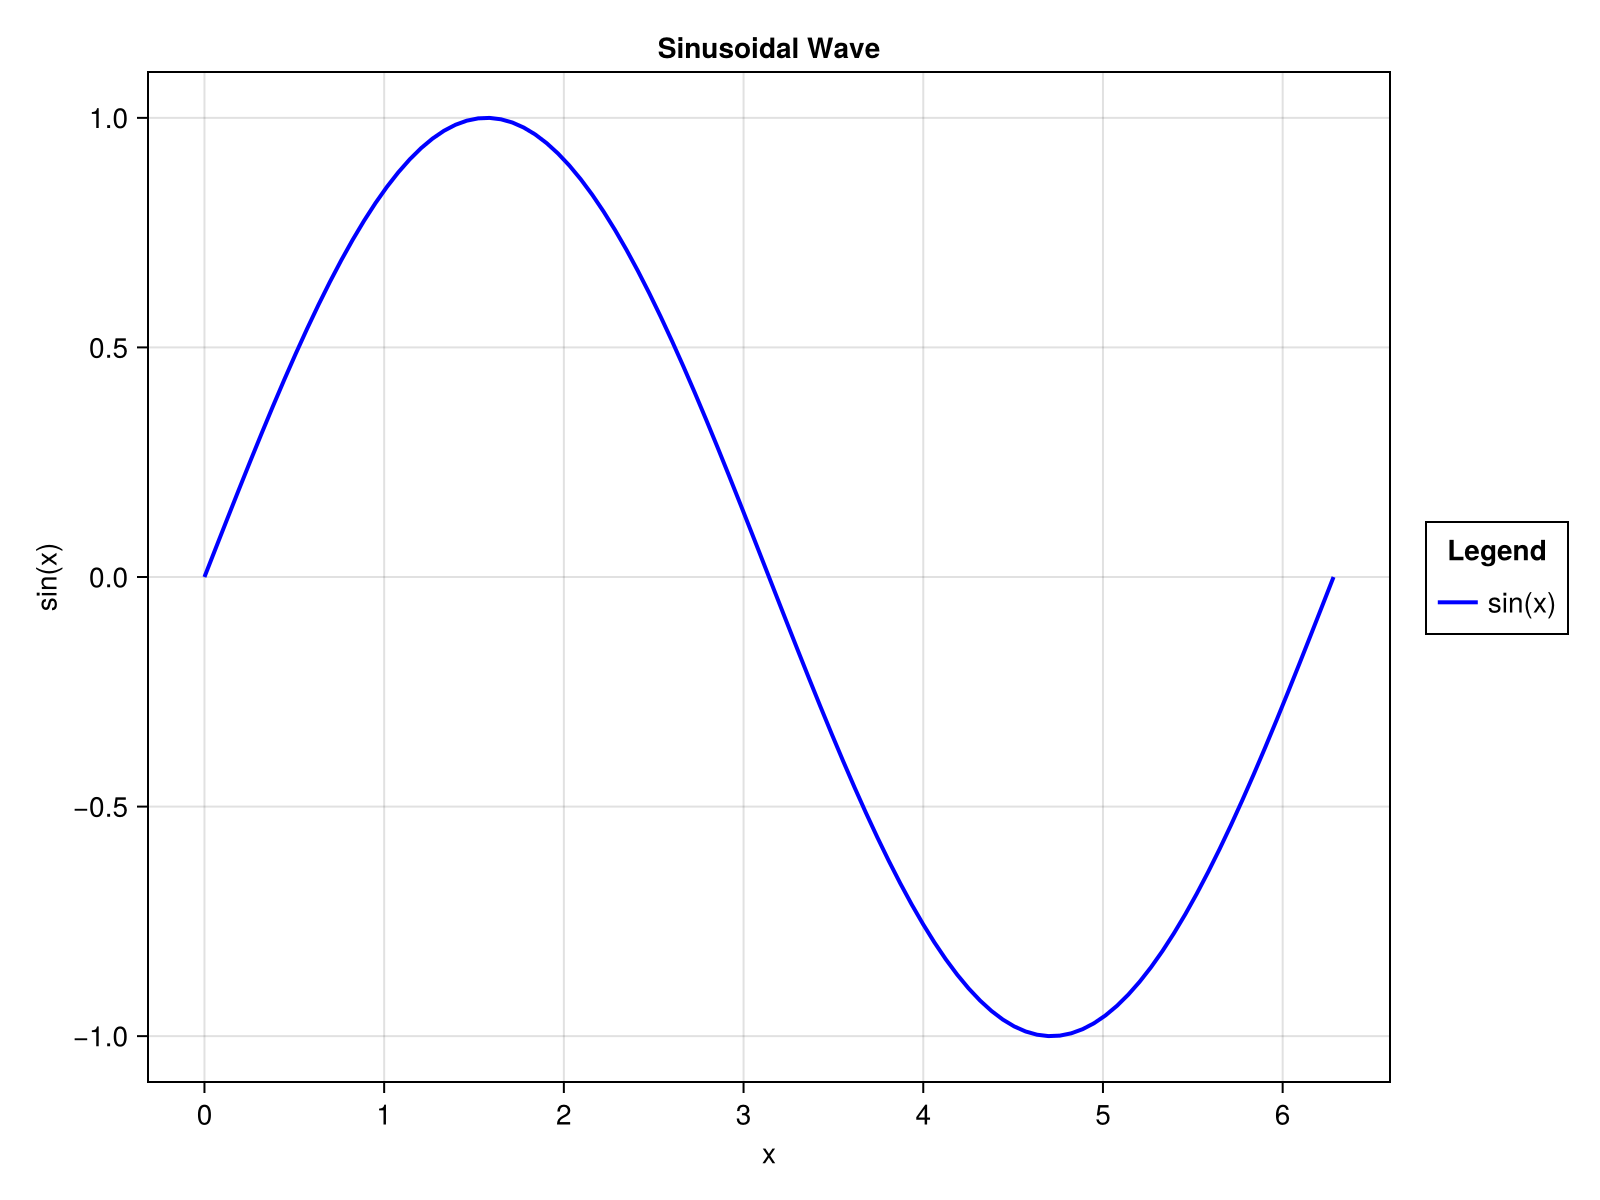

In [ ]:
# Create a simple plot
fig = Figure(size= (800, 600))
ax = Axis(fig[1, 1], title = "Sinusoidal Wave", xlabel = "x", ylabel = "sin(x)")

# Generate data
x = LinRange(0, 2pi, 100)
y = sin.(x)

# Plot the data
lines!(ax, x, y, color = :blue, linewidth = 2, label = "sin(x)")

# Add a legend
Legend(fig[1, 2], ax, "Legend")

# Display the figure
fig

#### Creating Complex Plots

Makie.jl allows for the creation of complex plots with multiple subplots and interactive features.

In [ ]:
using Pkg
Pkg.add("CairoMakie")  # Alternative backend

   Resolving package versions...
   Installed Pango_jll ── v1.52.2+0
   Installed CairoMakie ─ v0.12.2
   Installed Graphics ─── v1.1.2
   Installed Cairo ────── v1.0.5
    Updating `~/.julia/environments/v1.10/Project.toml`
  [13f3f980] + CairoMakie v0.12.2
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [159f3aea] + Cairo v1.0.5
  [13f3f980] + CairoMakie v0.12.2
  [a2bd30eb] + Graphics v1.1.2
  [36c8627f] + Pango_jll v1.52.2+0
Precompiling project...
  ✓ Pango_jll
  ✓ Graphics
  ✓ Cairo
  ✓ CairoMakie
  4 dependencies successfully precompiled in 17 seconds. 514 already precompiled.


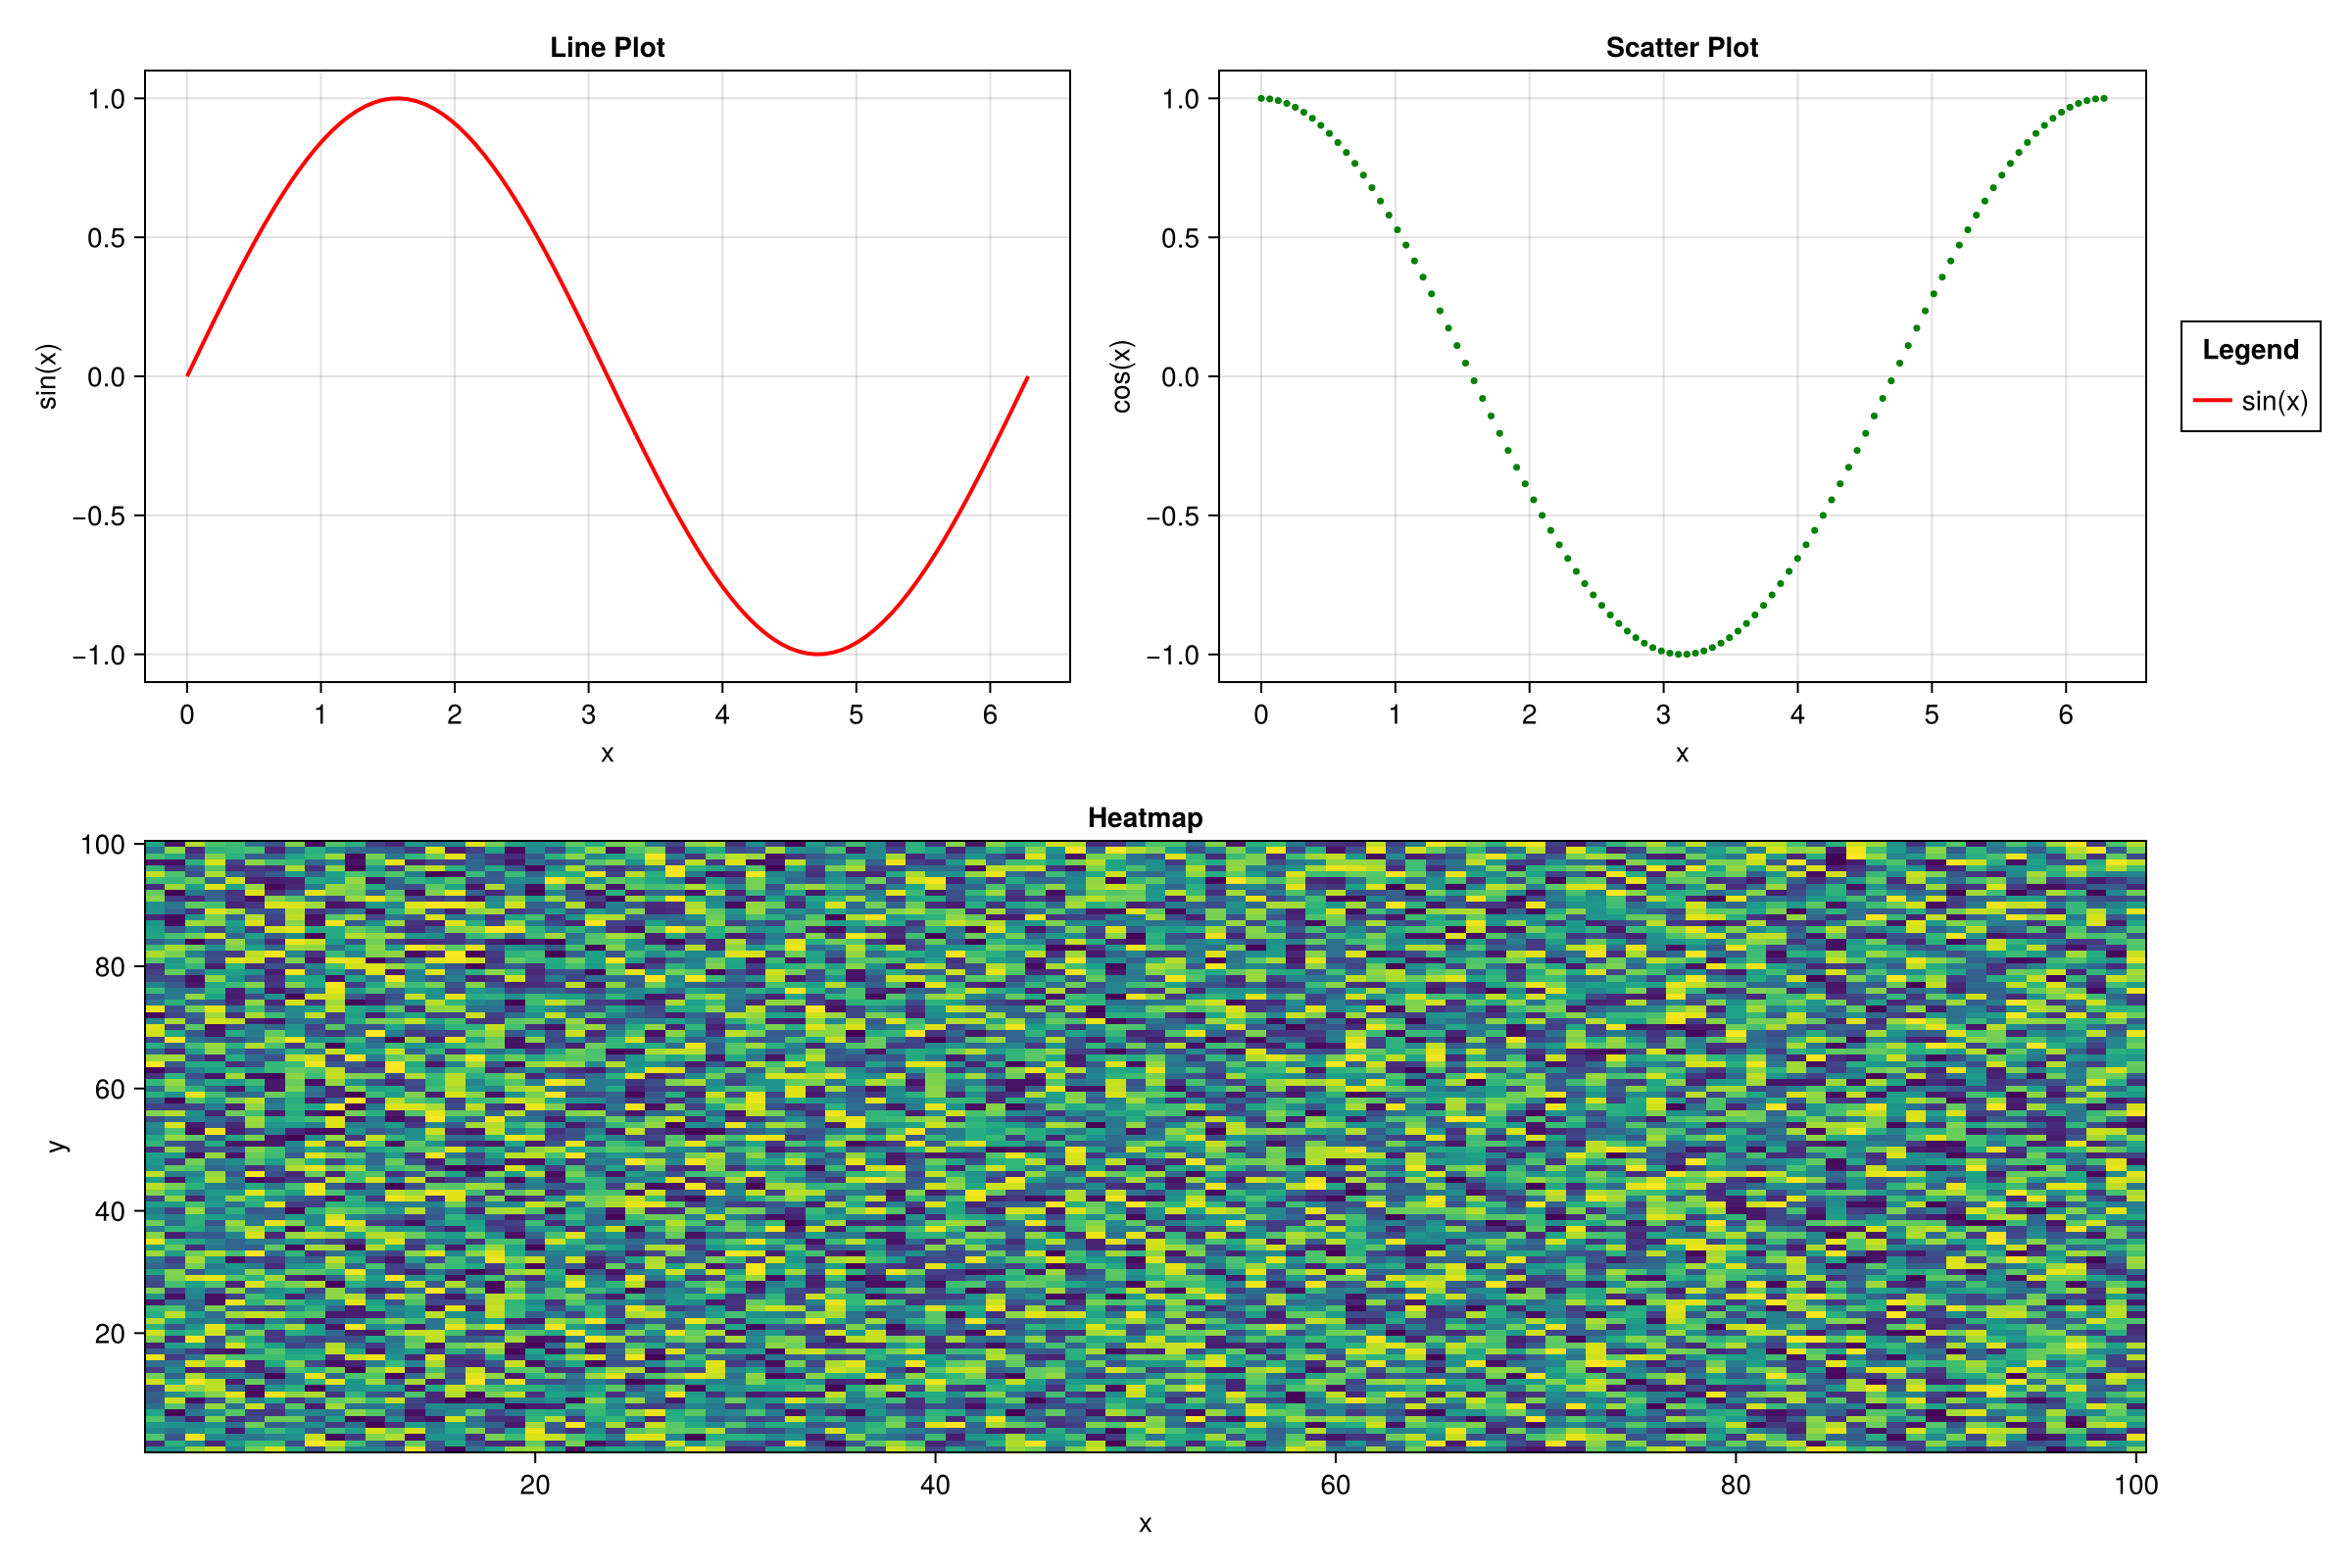

In [ ]:
using CairoMakie

# Create a figure with multiple subplots
fig = Figure(size = (1200, 800))

# Subplot 1: Line plot
ax1 = Axis(fig[1, 1], title = "Line Plot", xlabel = "x", ylabel = "sin(x)")
lines!(ax1, LinRange(0, 2pi, 100), sin.(LinRange(0, 2pi, 100)), color = :red, linewidth = 2, label = "sin(x)")

# Subplot 2: Scatter plot
ax2 = Axis(fig[1, 2], title = "Scatter Plot", xlabel = "x", ylabel = "cos(x)")
scatter!(ax2, LinRange(0, 2pi, 100), cos.(LinRange(0, 2pi, 100)), color = :green, markersize = 5, label = "cos(x)")

# Subplot 3: Heatmap
ax3 = Axis(fig[2, 1:2], title = "Heatmap", xlabel = "x", ylabel = "y")
heatmap!(ax3, rand(100, 100))

# Add legends
legend = Legend(fig, ax1, "Legend")
fig[1, 3] = legend

# Display the figure
fig

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/We6MY/src/scenes.jl:227


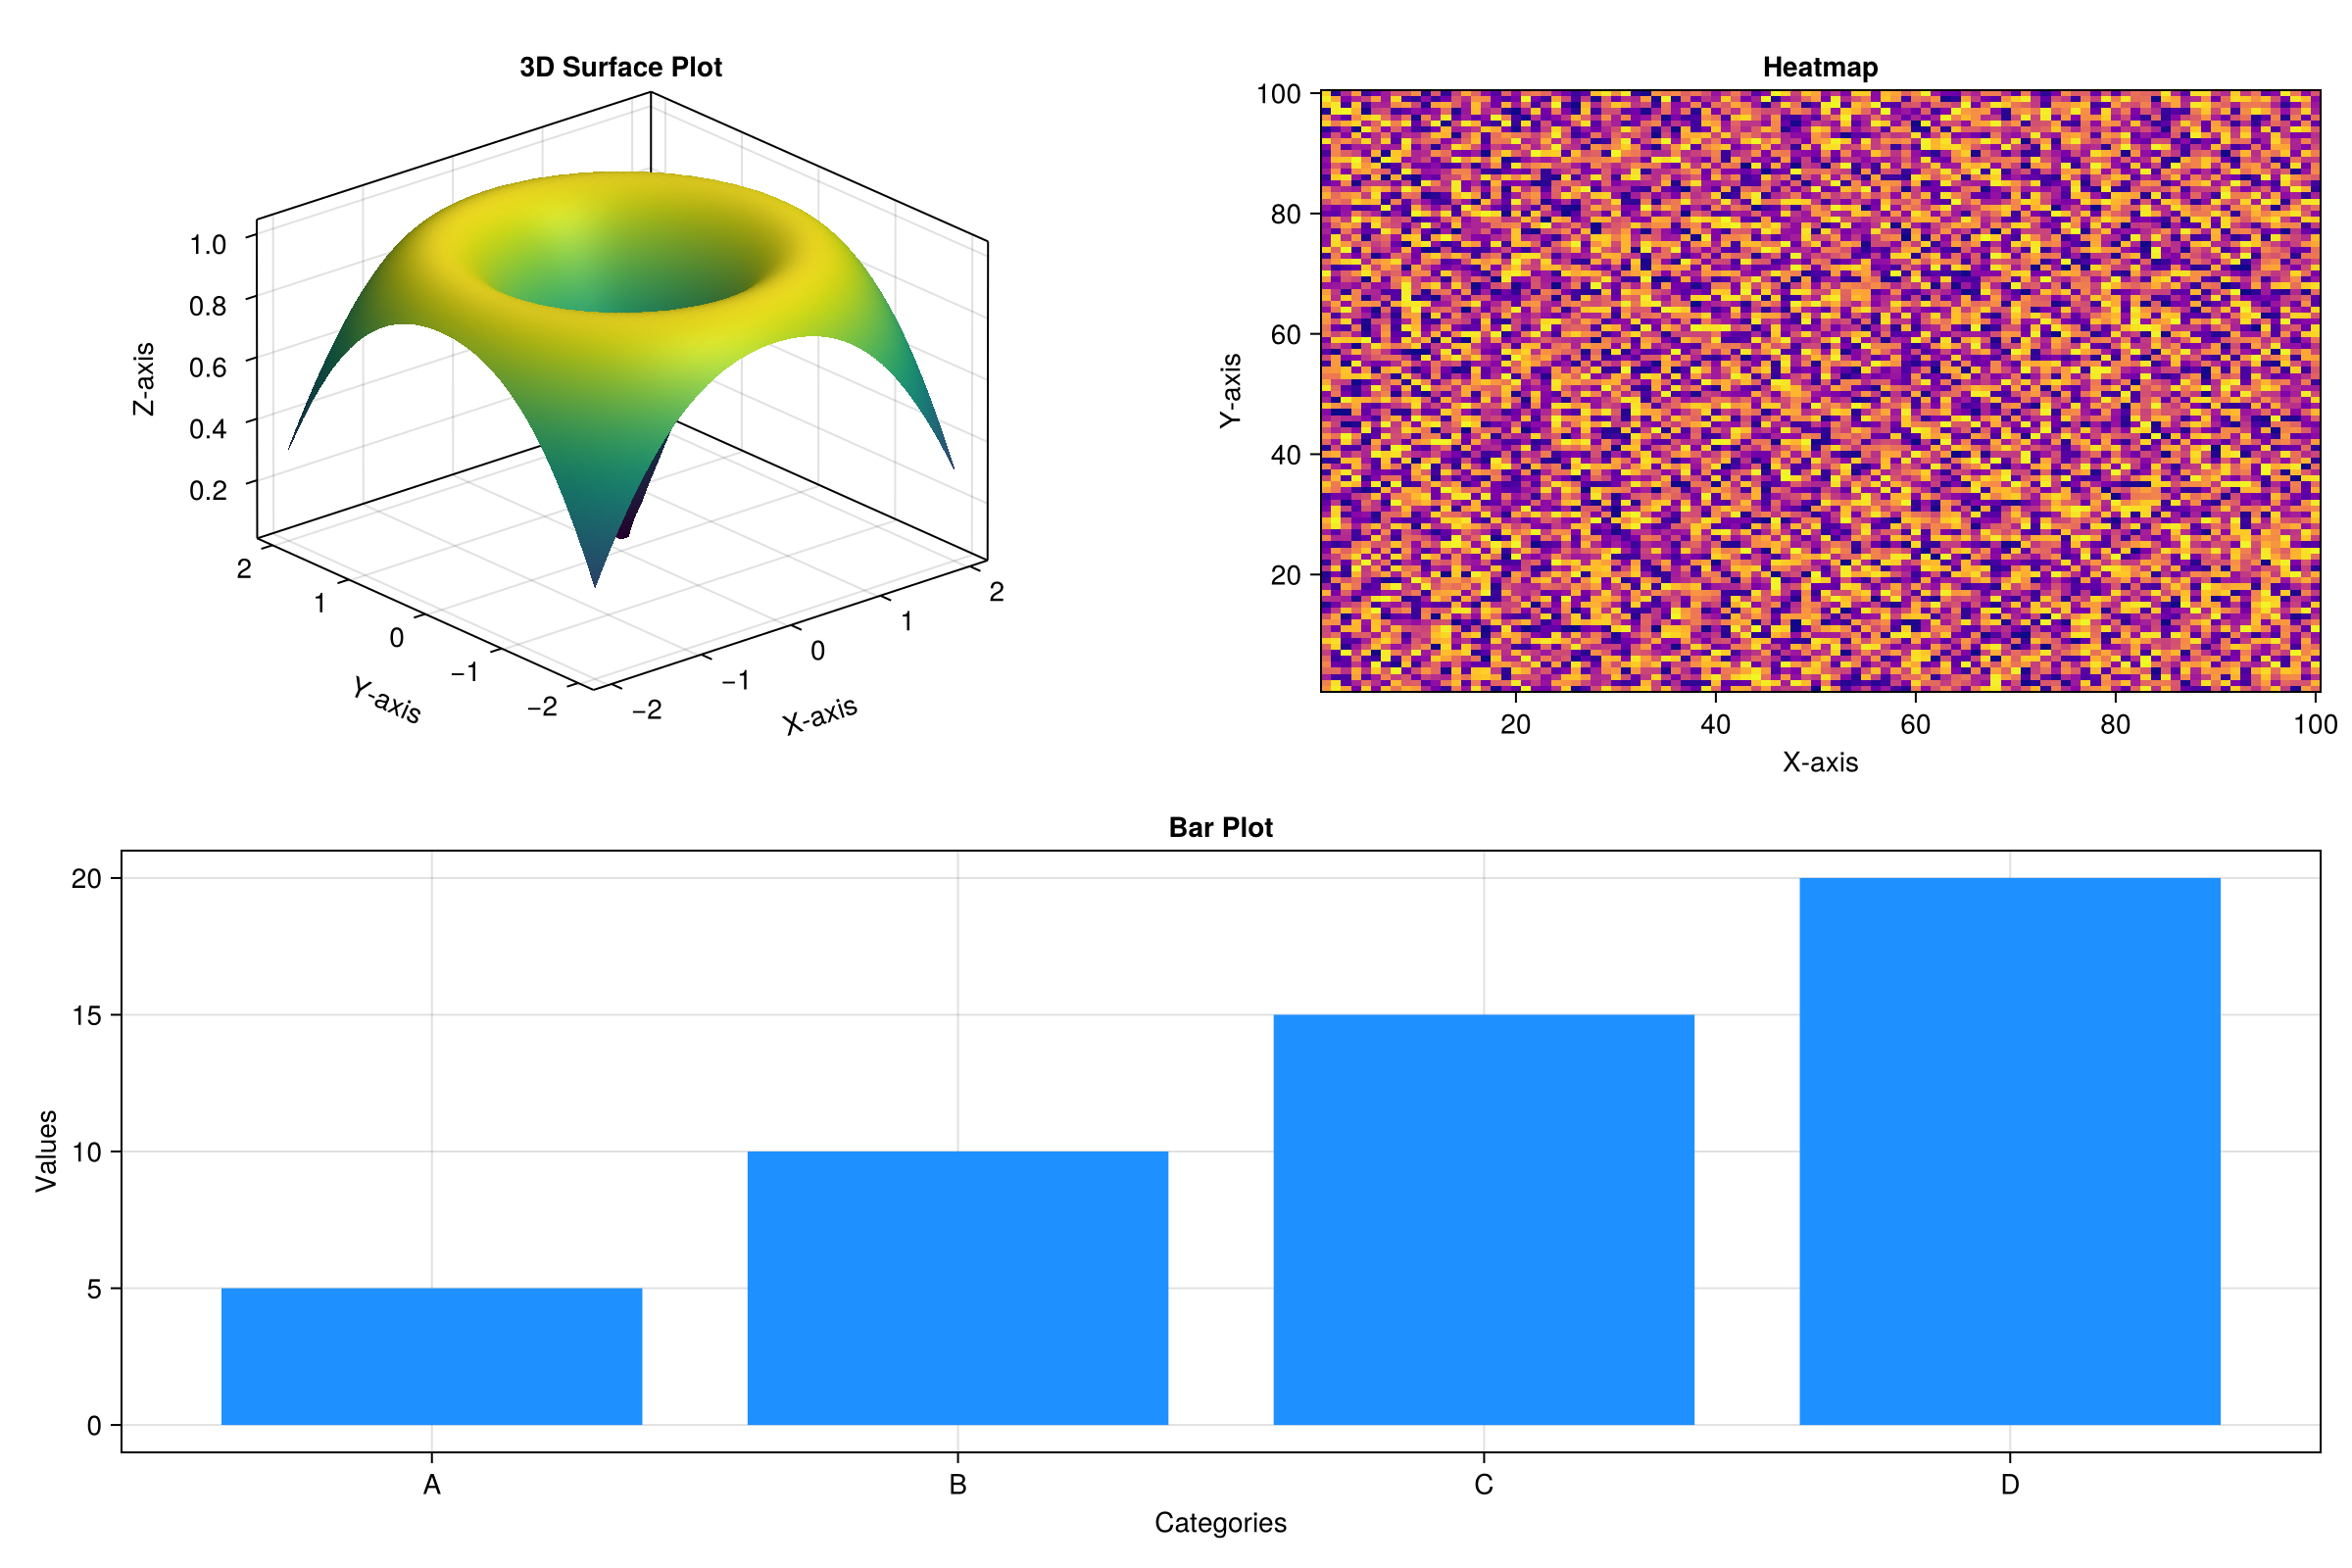

In [ ]:

using GLMakie

# Create a figure with the specified size
fig = Figure(resolution = (1200, 800))

# Subplot 1: 3D Surface plot
ax1 = Axis3(fig[1, 1], title = "3D Surface Plot", xlabel = "X-axis", ylabel = "Y-axis", zlabel = "Z-axis")
x = LinRange(-2, 2, 50)
y = LinRange(-2, 2, 50)
z = [sin(sqrt(xi^2 + yi^2)) for xi in x, yi in y]
surface!(ax1, x, y, z, colormap = :viridis)

# Subplot 2: Heatmap
ax2 = Axis(fig[1, 2], title = "Heatmap", xlabel = "X-axis", ylabel = "Y-axis")
heatmap!(ax2, rand(100, 100), colormap = :plasma)

# Subplot 3: Bar plot
ax3 = Axis(fig[2, 1:2], title = "Bar Plot", xlabel = "Categories", ylabel = "Values")
categories = ["A", "B", "C", "D"]
values = [5, 10, 15, 20]
bar_positions = 1:length(categories)
barplot!(ax3, bar_positions, values, color = :dodgerblue, strokewidth = 0)
ax3.xticks = (bar_positions, categories)

# Display the figure
fig


## Conclusion
In this chapter, we covered:
- Creating and using modules.
- Loading and using packages.
- Importing specific functions.
- Creating your own package.
- Managing packages with Pkg.
- Important Julia packages and their usage.

Next, we will explore data structures and algorithms in Julia.

## Exercises
Try these exercises to reinforce your understanding:
1. Create a module with a function that calculates the area of a circle and use it in a separate script.
2. Install and use a package for plotting (e.g., Plots.jl) to create a simple plot.
3. Create a small package with two functions: one that converts temperatures from Celsius to Fahrenheit and another that converts from Fahrenheit to Celsius.
4. Use `DataFrames.jl` to create a DataFrame from some sample data and perform basic operations.
5. Use `JuMP.jl` to solve a simple optimization problem of your choice.
6. Use `Makie.jl` to create a complex plot with multiple subplots, including a line plot, scatter plot, and heatmap.


# Data Structures and Algorithms

## Overview
This chapter covers common data structures and algorithms in Julia. We will explore arrays, dictionaries, sets, stacks, queues, linked lists, and basic algorithms such as searching and sorting.

## Arrays
Arrays are the most commonly used data structures in Julia. They store elements of the same type.

### Creating and Manipulating Arrays

In [ ]:

# Define an array
arr = [1, 2, 3, 4, 5]

# Access elements by index
println("First element: ", arr[1])

# Modify elements
arr[2] = 20
println("Modified array: ", arr)

# Add elements
push!(arr, 6)
println("Array after push: ", arr)

# Remove elements
pop!(arr)
println("Array after pop: ", arr)


First element: 1
Modified array: [1, 20, 3, 4, 5]
Array after push: [1, 20, 3, 4, 5, 6]
Array after pop: [1, 20, 3, 4, 5]


## Dictionaries
Dictionaries store key-value pairs and provide efficient lookups.

### Creating and Manipulating Dictionaries


In [ ]:
# Define a dictionary
dict = Dict("Alice" => 25, "Bob" => 30)

# Access values by key
println("Alice's age: ", dict["Alice"])

# Modify values
dict["Bob"] = 35
println("Modified dictionary: ", dict)

# Add key-value pairs
dict["Charlie"] = 40
println("Dictionary after addition: ", dict)

# Remove key-value pairs
delete!(dict, "Alice")
println("Dictionary after deletion: ", dict)

Alice's age: 25
Modified dictionary: Dict("Alice" => 25, "Bob" => 35)
Dictionary after addition: Dict("Alice" => 25, "Charlie" => 40, "Bob" => 35)
Dictionary after deletion: Dict("Charlie" => 40, "Bob" => 35)


## Sets
Sets store unique elements and provide efficient membership tests.

### Creating and Manipulating Sets

In [ ]:

# Define a set
s = Set([1, 2, 3, 3, 2, 1])

# Add elements
push!(s, 4)
println("Set after push: ", s)

# Remove elements
delete!(s, 2)
println("Set after delete: ", s)

# Check membership
println("Is 3 in the set? ", 3 in s)


Set after push: Set([4, 2, 3, 1])
Set after delete: Set([4, 3, 1])
Is 3 in the set? true


## Stacks and Queues
Stacks and queues are data structures that follow specific orderings for adding and removing elements.

### Stack (LIFO)

In [ ]:

# Define a stack using an array
stack = Int[]

# Push elements onto the stack
push!(stack, 1)
push!(stack, 2)
push!(stack, 3)
println("Stack after pushes: ", stack)

# Pop elements from the stack
println("Popped element: ", pop!(stack))
println("Stack after pop: ", stack)


Stack after pushes: [1, 2, 3]
Popped element: 3
Stack after pop: [1, 2]


### Queue (FIFO)

In [ ]:
# Define a queue using an array
queue = Int[]

# Enqueue elements
push!(queue, 1)
push!(queue, 2)
push!(queue, 3)
println("Queue after enqueues: ", queue)

# Dequeue elements
println("Dequeued element: ", popfirst!(queue))
println("Queue after dequeue: ", queue)


Queue after enqueues: [1, 2, 3]
Dequeued element: 1
Queue after dequeue: [2, 3]


## Linked Lists
Linked lists are linear data structures where each element points to the next.

### Creating and Manipulating Linked Lists

In [ ]:

# Define a node
mutable struct Node
    value::Int
    next::Union{Nothing, Node}
end

# Create nodes
n1 = Node(1, nothing)
n2 = Node(2, nothing)
n3 = Node(3, nothing)

# Link nodes
n1.next = n2
n2.next = n3

# Traverse the linked list
current = n1
while current != nothing
    println("Node value: ", current.value)
    current = current.next
end


Node value: 1
Node value: 2
Node value: 3


## Basic Algorithms

### Searching Algorithms
#### Linear Search

In [ ]:

# Define a linear search function
function linear_search(arr, target)
    for i in 1:length(arr)
        if arr[i] == target
            return i
        end
    end
    return -1  # Return -1 if the target is not found
end

# Test the linear search function
arr = [10, 20, 30, 40, 50]
target = 30
index = linear_search(arr, target)
println("Index of $target: ", index)


Index of 30: 3


#### Binary Search
Binary search requires the array to be sorted.

In [ ]:

# Define a binary search function
function binary_search(arr, target)
    low = 1
    high = length(arr)
    while low <= high
        mid = div(low + high, 2)
        if arr[mid] == target
            return mid
        elseif arr[mid] < target
            low = mid + 1
        else
            high = mid - 1
        end
    end
    return -1  # Return -1 if the target is not found
end

# Test the binary search function
arr = [10, 20, 30, 40, 50]
target = 30
index = binary_search(arr, target)
println("Index of $target: ", index)


Index of 30: 3


### Sorting Algorithms
#### Bubble Sort

In [ ]:

# Define a bubble sort function
function bubble_sort(arr)
    n = length(arr)
    for i in 1:n-1
        for j in 1:n-i
            if arr[j] > arr[j+1]
                arr[j], arr[j+1] = arr[j+1], arr[j]  # Swap elements
            end
        end
    end
    return arr
end

# Test the bubble sort function
arr = [64, 34, 25, 12, 22, 11, 90]
sorted_arr = bubble_sort(arr)
println("Sorted array: ", sorted_arr)


Sorted array: [11, 12, 22, 25, 34, 64, 90]


#### Quick Sort

In [ ]:

# Define a quick sort function
function quick_sort(arr)
    if length(arr) <= 1
        return arr
    end
    pivot = arr[end]
    left = [x for x in arr[1:end-1] if x <= pivot]
    right = [x for x in arr[1:end-1] if x > pivot]
    return [quick_sort(left)..., pivot, quick_sort(right)...]
end

# Test the quick sort function
arr = [64, 34, 25, 12, 22, 11, 90]
sorted_arr = quick_sort(arr)
println("Sorted array: ", sorted_arr)


Sorted array: [11, 12, 22, 25, 34, 64, 90]


## Conclusion
In this chapter, we covered:
- Arrays
- Dictionaries
- Sets
- Stacks and queues
- Linked lists
- Basic algorithms: searching and sorting

Next, we will explore working with data in Julia.

## Exercises
Try these exercises to reinforce your understanding:
1. Implement a stack using a linked list.
2. Create a function that performs a binary search on a sorted linked list.
3. Write a function that performs merge sort on an array.
4. Implement a priority queue using a heap.
5. Create a dictionary that maps student names to their grades and perform basic operations on it.


# Working with Data

## Overview
This chapter covers how to work with data in Julia, including loading, manipulating, and visualizing data using common data packages.

## Loading Data

### Using CSV.jl to Load Data

`CSV.jl` is a package for reading and writing CSV files.


In [94]:

using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")

using CSV
using DataFrames

# Load a CSV file into a DataFrame
df = CSV.File("path/to/your/data.csv") |> DataFrame

# Display the first few rows of the DataFrame
first(df, 5)


   Resolving package versions...
   Installed WeakRefStrings ── v1.4.2
   Installed WorkerUtilities ─ v1.6.1
   Installed CSV ───────────── v0.10.14
    Updating `~/.julia/environments/v1.10/Project.toml`
  [336ed68f] + CSV v0.10.14
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [336ed68f] + CSV v0.10.14
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1
Precompiling project...
  ✓ WorkerUtilities
  ✓ WeakRefStrings
  ✓ CSV
  3 dependencies successfully precompiled in 10 seconds. 531 already precompiled.
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


LoadError: ArgumentError: "path/to/your/data.csv" is not a valid file or doesn't exist

### Creating DataFrames

You can also create DataFrames manually.

In [96]:

# Create a DataFrame
df = DataFrame(Name=["Alice", "Bob", "Charlie"], Age=[25, 30, 35], Salary=[50000, 60000, 70000])

# Display the DataFrame
println(df)


3×3 DataFrame
 Row │ Name     Age    Salary 
     │ String   Int64  Int64  
─────┼────────────────────────
   1 │ Alice       25   50000
   2 │ Bob         30   60000
   3 │ Charlie     35   70000


## Manipulating Data

### Basic Operations
Perform common data manipulation tasks such as filtering, sorting, and grouping.

In [108]:
using DataFrames
using Statistics

# Create a DataFrame
df = DataFrame(Name=["Alice", "Bob", "Charlie"], Age=[25, 30, 35], Salary=[50000, 60000, 70000])

# Filter rows where Age is greater than 30
df_filtered = filter(row -> row.Age > 30, df)

# Sort the DataFrame by Salary
df_sorted = sort(df, :Salary, rev=true)

# Group by a column and calculate summary statistics
df_grouped = combine(groupby(df, :Age), :Salary => mean => :AverageSalary)

# Display the manipulated DataFrames
println("Filtered DataFrame: ", df_filtered)
println("Sorted DataFrame: ", df_sorted)
println("Grouped DataFrame: ", df_grouped)


Filtered DataFrame: 1×3 DataFrame
 Row │ Name     Age    Salary 
     │ String   Int64  Int64  
─────┼────────────────────────
   1 │ Charlie     35   70000
Sorted DataFrame: 3×3 DataFrame
 Row │ Name     Age    Salary 
     │ String   Int64  Int64  
─────┼────────────────────────
   1 │ Charlie     35   70000
   2 │ Bob         30   60000
   3 │ Alice       25   50000
Grouped DataFrame: 3×2 DataFrame
 Row │ Age    AverageSalary 
     │ Int64  Float64       
─────┼──────────────────────
   1 │    25        50000.0
   2 │    30        60000.0
   3 │    35        70000.0


## Data Visualization

### Using Plots.jl for Visualization
`Plots.jl` is a powerful plotting package in Julia.

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/We6MY/src/scenes.jl:227
┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/We6MY/src/scenes.jl:227
┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` o

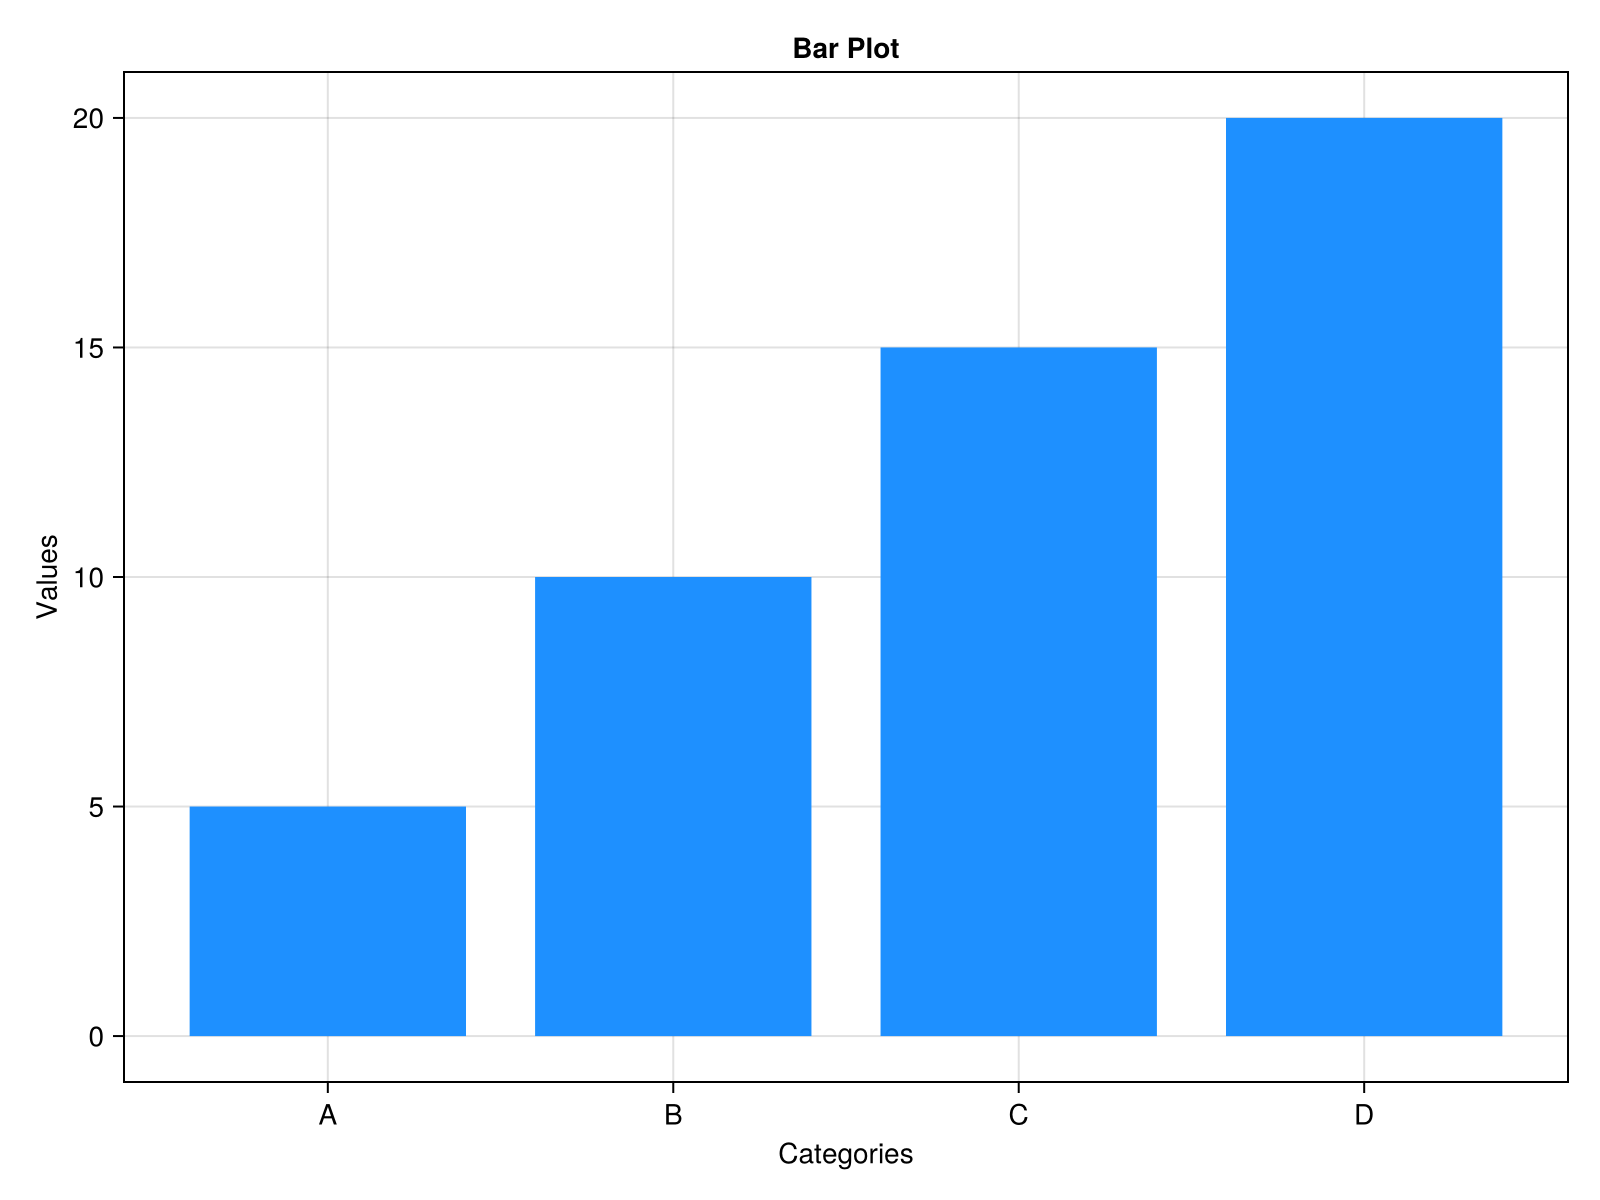

In [140]:

using GLMakie

# Line plot
fig1 = Figure(resolution = (800, 600))
ax1 = Axis(fig1[1, 1], title = "Line Plot", xlabel = "X-axis", ylabel = "Y-axis")
x = 1:10
y = rand(10)
lines!(ax1, x, y, label = "Random Data", color = :blue)
fig1

# Scatter plot
fig2 = Figure(resolution = (800, 600))
ax2 = Axis(fig2[1, 1], title = "Scatter Plot", xlabel = "X-axis", ylabel = "Y-axis")
scatter!(ax2, x, y, label = "Random Data", color = :red)
fig2

# Bar plot
fig3 = Figure(resolution = (800, 600))
ax3 = Axis(fig3[1, 1], title = "Bar Plot", xlabel = "Categories", ylabel = "Values")
categories = ["A", "B", "C", "D"]
values = [5, 10, 15, 20]
bar_positions = 1:length(categories)
barplot!(ax3, bar_positions, values, color = :dodgerblue)
ax3.xticks = (bar_positions, categories)
fig3


### Advanced Visualization with Makie.jl
For more advanced visualizations, `Makie.jl` can be used.

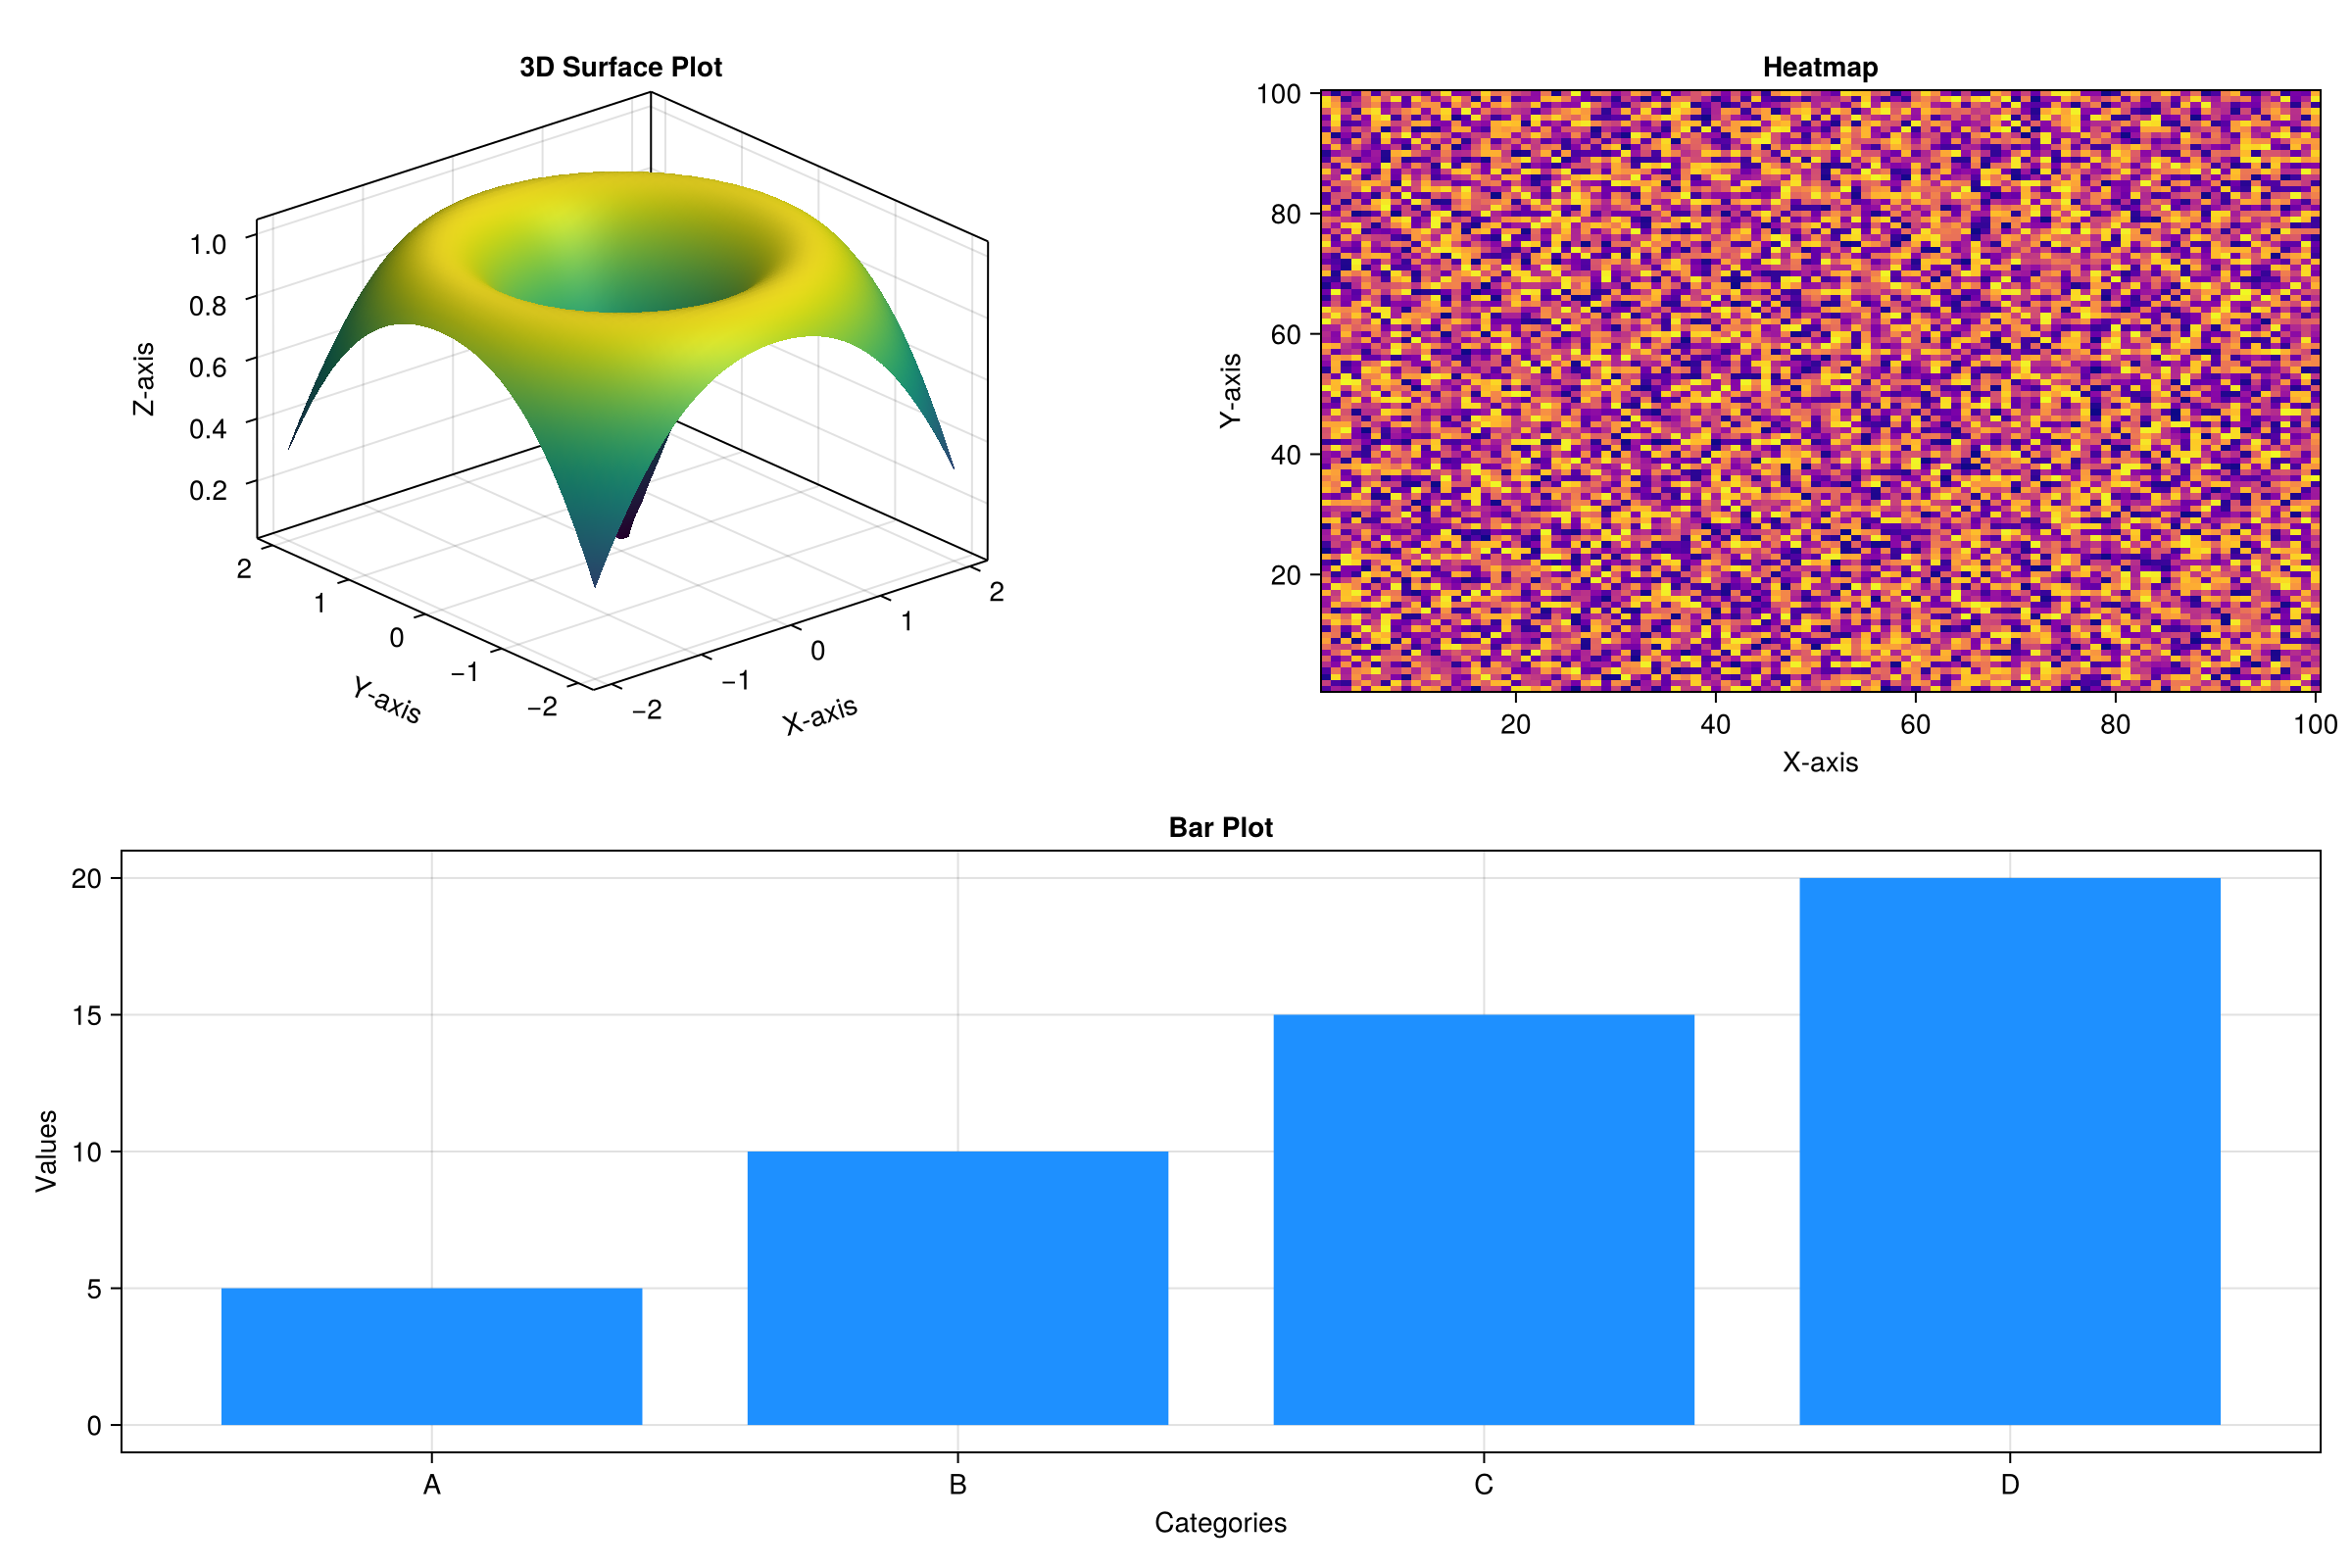

In [120]:

using GLMakie

# Create a figure with multiple subplots
fig = Figure(size = (1200, 800))

# Subplot 1: 3D Surface plot
ax1 = Axis3(fig[1, 1], title = "3D Surface Plot", xlabel = "X-axis", ylabel = "Y-axis", zlabel = "Z-axis")
x = LinRange(-2, 2, 50)
y = LinRange(-2, 2, 50)
z = [sin(sqrt(xi^2 + yi^2)) for xi in x, yi in y]
surface!(ax1, x, y, z, colormap = :viridis)

# Subplot 2: Heatmap
ax2 = Axis(fig[1, 2], title = "Heatmap", xlabel = "X-axis", ylabel = "Y-axis")
heatmap!(ax2, rand(100, 100), colormap = :plasma)

# Subplot 3: Bar plot
ax3 = Axis(fig[2, 1:2], title = "Bar Plot", xlabel = "Categories", ylabel = "Values")
categories = ["A", "B", "C", "D"]
values = [5, 10, 15, 20]
bar_positions = 1:length(categories)
barplot!(ax3, bar_positions, values, color = :dodgerblue, strokewidth = 0)
ax3.xticks = (bar_positions, categories)

# Display the figure
fig


## Data Analysis

### Statistical Analysis
Perform basic statistical analysis using Julia.

In [122]:

using Statistics

# Calculate mean, median, and standard deviation
mean_age = mean(df.Age)
median_age = median(df.Age)
std_age = std(df.Age)

# Display the statistics
println("Mean Age: ", mean_age)
println("Median Age: ", median_age)
println("Standard Deviation of Age: ", std_age)


Mean Age: 30.0
Median Age: 30.0
Standard Deviation of Age: 5.0


### Linear Regression
Perform linear regression using `GLM.jl`.

In [142]:

using Pkg
Pkg.add("GLM")

using GLM

# Create a DataFrame for regression
df_reg = DataFrame(X = 1:10, Y = 2 .* (1:10) .+ rand(10))

# Fit a linear model
model = lm(@formula(Y ~ X), df_reg)

# Display the model summary
println(coeftable(model))


   Resolving package versions...
   Installed GLM ─────────── v1.9.0
   Installed ShiftedArrays ─ v2.0.0
   Installed StatsModels ─── v0.7.3
    Updating `~/.julia/environments/v1.10/Project.toml`
  [38e38edf] + GLM v1.9.0
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [38e38edf] + GLM v1.9.0
  [1277b4bf] + ShiftedArrays v2.0.0
  [3eaba693] + StatsModels v0.7.3
Precompiling project...
  ✓ ShiftedArrays
  ✓ StatsModels
  ✓ GLM
  3 dependencies successfully precompiled in 3 seconds. 534 already precompiled.


────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.575977   0.153392    3.75    0.0056   0.222255   0.929699
X            1.98405    0.0247213  80.26    <1e-12   1.92704    2.04105
────────────────────────────────────────────────────────────────────────


## Conclusion
In this chapter, we covered:
- Loading data using `CSV.jl`
- Creating and manipulating DataFrames
- Visualizing data with `Plots.jl` and `Makie.jl`
- Performing basic statistical analysis
- Conducting linear regression with `GLM.jl`

Next, we will explore more advanced topics in data science and machine learning with Julia.

## Exercises
Try these exercises to reinforce your understanding:
1. Load a dataset from a CSV file and perform basic manipulations (filtering, sorting, grouping).
2. Create various types of plots (line plot, scatter plot, bar plot) using `Plots.jl`.
3. Perform a linear regression analysis on a sample dataset and interpret the results.
4. Use `Makie.jl` to create a visually appealing multi-panel figure with different types of plots.
